In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import math

In [158]:
def AR(n,mean,std):
    np.random.seed(42)
    e = std * np.random.randn(n) + mean
    y = np.zeros(len(e))
    for i in range(len(e)):
        if i == 0:
            y[i] = e[i]
        elif i == 1:
            y[i] = 0.5 * y[i-1] + e[i]
        else:
            y[i] = 0.5 * y[i - 1] + 0.2 * y[i - 2] + e[i]
    print("Mean of y(t) - 0.5y(t-1) -0.2y(t-2) = e(t) is:  ", y.mean())
    print("Variance of y(t) - 0.5y(t-1) -0.2y(t-2) = e(t) is: ", y.var())
    return y,n,y.mean(),y.var()

In [159]:
def MA(n,mean,std):
    np.random.seed(42)
    e = std * np.random.randn(n) + mean
    y = np.zeros(len(e))
    for i in range(len(e)):
        if i == 0:
            y[i] = e[i]
        elif i == 1:
            y[i] = e[i] + 0.1 * e[i-1]
        else:
            y[i] = e[i] + 0.1 * e[i-1] + 0.4 * e[i-2]
    print("Mean of y(t) = e(t) + 0.1e(t-1) + 0.4e(t-2) is :  ", y.mean())
    print("Variance of y(t) = e(t) + 0.1e(t-1) + 0.4e(t-2)is: ", y.var())
    return y,n,y.mean(),y.var()

In [160]:
def ARMA(n,mean,std):
    np.random.seed(42)
    e = std * np.random.randn(n) + mean
    y = np.zeros(len(e))
    for i in range(len(e)):
        if i == 0:
            y[i] = e[i]
        elif i == 1:
            y[i] = e[i] + 0.1 * e[i-1] + 0.5 * y[i-1]
        else:
            y[i] = e[i] + 0.1 * e[i-1] + 0.4 * e[i-2] + 0.5 * y[i-1] + 0.2 * y[i-2]
    print("Mean of y(t) -0.5y(t-1) - 0.2y(t-2) = e(t) + 0.1e(t-1) + 0.4e(t-2) is :  ", y.mean())
    print("Variance of y(t) -0.5y(t-1) - 0.2y(t-2) = e(t) + 0.1e(t-1) + 0.4e(t-2) is : ", y.var())
    return y,n,y.mean(),y.var()

In [161]:
def ACF(data,lags):
    # convert input data into a numpy array
    data = np.array(data)
    # acf will store the autocorreltion coefficent at each lag interval
    # the first datapoint is always 1.0 since anything correlated with itsself is = 1
    acf = [1.0]
    # calculate the mean for the entire dataset
    y_bar = data.mean()
    print("The mean of this dataset is: ",y_bar)
    # subtract the mean from each observation
    yy_bar = data - y_bar
    # clacualte the total variance for the data set
    total_variance = sum(np.square(yy_bar))
    #print("The total variance for this dataset is: ", total_variance)
    # perform a forloop over the dataset with the desired number of lags
    # range is 1,lags b/c the first iteration calcualtes T1
    for i in range(1,lags):
        # first nparray is removing the last element each iteration
        yy_bar_bottom = yy_bar[:-i]
        # second nparray removes the first element each interation
        yy_bar_top = yy_bar[i:]
        # take the sum of of the product of each nparray each iteration
        yy = sum(yy_bar_top * yy_bar_bottom)
        # divide the sum by total variance and append to resulting acf list
        acf.append(yy/total_variance)
    return acf

In [162]:
def acf_plot(y):
    #y = y.tolist()
    y_rev = y[::-1]
    y_rev.extend(y[1:])
    print(len(y_rev))
    lb = -(math.floor(len(y_rev)/2))
    hb = -(lb-1)
    x = np.array(list(range(lb,hb)))
    figure = plt.stem(x,y_rev,use_line_collection=True)
    plt.xlabel('Lag', fontsize=15)
    plt.ylabel('AC Coefficent', fontsize=15)
    plt.title('ACF of Residuals',fontsize=18)
    plt.show()

    #return y_rev

In [163]:
# Example of AR(2)
# y(t) - 0.5y(t-1) -0.2y(t-2) = e(t)
# white noise WN (2,1).

In [164]:
# 1
# A. calculate the theoretical mean and variance of the data

In [165]:
# B. Create 100 samples of the AR(2) process above
# C. Calculate the experimental mean and variance

In [166]:
AR100 = AR(100,2,1)

Mean of y(t) - 0.5y(t-1) -0.2y(t-2) = e(t) is:   6.134010832422384
Variance of y(t) - 0.5y(t-1) -0.2y(t-2) = e(t) is:  1.3915272059559658


In [167]:
# D. Increae sample size to 1,000
AR1000 = AR(1000,2,1)

Mean of y(t) - 0.5y(t-1) -0.2y(t-2) = e(t) is:   6.709725724529805
Variance of y(t) - 0.5y(t-1) -0.2y(t-2) = e(t) is:  1.645599714280936


In [168]:
# D. Increase samples to 10,000
AR10000 = AR(10000,2,1)

Mean of y(t) - 0.5y(t-1) -0.2y(t-2) = e(t) is:   6.6574993066255255
Variance of y(t) - 0.5y(t-1) -0.2y(t-2) = e(t) is:  1.6468782267283972


In [169]:
# E. Create table to store resutls
# F. Add resutls from 1k and 10k samples to table

header = np.array(["N","Mean","Variance"])
actual = np.array(["Theoretical","6.66","1.709"])
table = np.array([header,actual,AR100[1:],AR1000[1:],AR10000[1:]])
df_AR_results = pd.DataFrame(data=table)
df_AR_results


,0,1,2
0,N,Mean,Variance
1,Theoretical,6.66,1.709
2,100,6.134010832422384,1.3915272059559658
3,1000,6.709725724529805,1.645599714280936
4,10000,6.6574993066255255,1.6468782267283972


In [170]:
# G plot the autocorrelation of y(t)
# 20, 40, and 80 lags

The mean of this dataset is:  6.6574993066255255
39


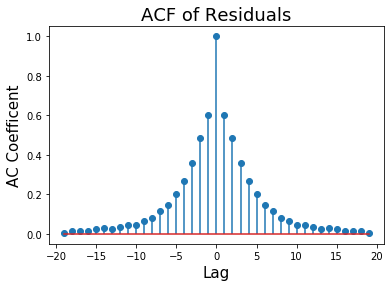

In [171]:
acf_20 = ACF(AR10000[0],20)
acf_plot(acf_20)

The mean of this dataset is:  6.6574993066255255
79


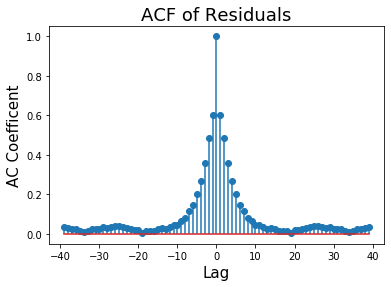

In [172]:
acf_40 = ACF(AR10000[0],40)
acf_plot(acf_40)

The mean of this dataset is:  6.6574993066255255
159


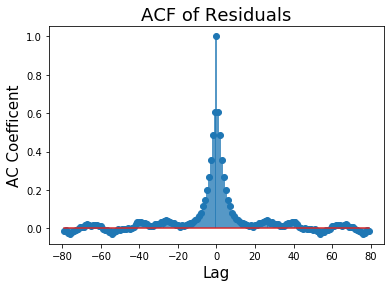

In [173]:
acf_80 = ACF(AR10000[0],80)
acf_plot(acf_80)

In [174]:
# 2 100 samples for MA(2) y(t) = e(t) + 0.1e(t-1) + 0.4e(t-2)

In [175]:
MA100 = MA(100,2,1)

Mean of y(t) = e(t) + 0.1e(t-1) + 0.4e(t-2) is :   2.827382705749165
Variance of y(t) = e(t) + 0.1e(t-1) + 0.4e(t-2)is:  0.9264701682001014


In [176]:
MA1000 = MA(1000,2,1)

Mean of y(t) = e(t) + 0.1e(t-1) + 0.4e(t-2) is :   3.0271402639387235
Variance of y(t) = e(t) + 0.1e(t-1) + 0.4e(t-2)is:  1.11936484907547


In [177]:
MA10000 = MA(10000,2,1)

Mean of y(t) = e(t) + 0.1e(t-1) + 0.4e(t-2) is :   2.996563974901763
Variance of y(t) = e(t) + 0.1e(t-1) + 0.4e(t-2)is:  1.1608904796459285


In [178]:
# E. Create table to store resutls
# F. Add resutls from 1k and 10k samples to table

header1 = np.array(["N","Mean","Variance"])
actual1 = np.array(["Theoretical","3","1.17"])
table1 = np.array([header1,actual1,MA100[1:],MA1000[1:],MA10000[1:]])
df_MA_results = pd.DataFrame(data=table1)
df_MA_results

,0,1,2
0,N,Mean,Variance
1,Theoretical,3,1.17
2,100,2.827382705749165,0.9264701682001014
3,1000,3.0271402639387235,1.11936484907547
4,10000,2.996563974901763,1.1608904796459285


The mean of this dataset is:  2.996563974901763
39


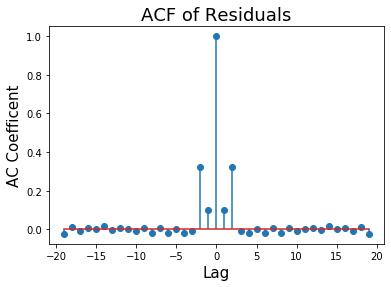

In [179]:
# G plot the autocorrelation of y(t)
# 20, 40, and 80 lags
acf_201 = ACF(MA10000[0],20)
acf_plot(acf_201)

The mean of this dataset is:  2.996563974901763
79


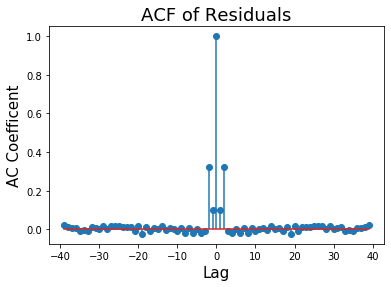

In [180]:
acf_401 = ACF(MA10000[0],40)
acf_plot(acf_401)

The mean of this dataset is:  2.996563974901763
159


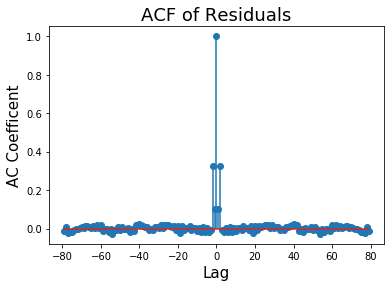

In [181]:
acf_801 = ACF(MA10000[0],80)
acf_plot(acf_801)

In [182]:
# 3 100 samples for ARMA(2,2) y(t) -0.5y(t-1) - 0.2y(t-2) = e(t) + 0.1e(t-1) + 0.4e(t-2)

In [183]:
ARMA100 = ARMA(100,2,1)

Mean of y(t) -0.5y(t-1) - 0.2y(t-2) = e(t) + 0.1e(t-1) + 0.4e(t-2) is :   9.144764625198754
Variance of y(t) -0.5y(t-1) - 0.2y(t-2) = e(t) + 0.1e(t-1) + 0.4e(t-2) is :  2.8058290517083733


In [184]:
ARMA1000 = ARMA(1000,2,1)

Mean of y(t) -0.5y(t-1) - 0.2y(t-2) = e(t) + 0.1e(t-1) + 0.4e(t-2) is :   10.058327428924692
Variance of y(t) -0.5y(t-1) - 0.2y(t-2) = e(t) + 0.1e(t-1) + 0.4e(t-2) is :  2.939506967709488


In [185]:
ARMA10000 = ARMA(10000,2,1)

Mean of y(t) -0.5y(t-1) - 0.2y(t-2) = e(t) + 0.1e(t-1) + 0.4e(t-2) is :   9.985646228306974
Variance of y(t) -0.5y(t-1) - 0.2y(t-2) = e(t) + 0.1e(t-1) + 0.4e(t-2) is :  2.8529705831441023


In [192]:
# E. Create table to store resutls
# F. Add resutls from 1k and 10k samples to table

header2 = np.array(["N","Mean","Variance"])
actual2 = np.array(["Theoretical","10","2.795"])
table2 = np.array([header2,actual2,ARMA100[1:],ARMA1000[1:],ARMA10000[1:]])
df_ARMA_results = pd.DataFrame(data=table2)
df_ARMA_results

,0,1,2
0,N,Mean,Variance
1,Theoretical,10,2.795
2,100,9.144764625198754,2.8058290517083733
3,1000,10.058327428924692,2.939506967709488
4,10000,9.985646228306974,2.8529705831441023


The mean of this dataset is:  9.985646228306974
39


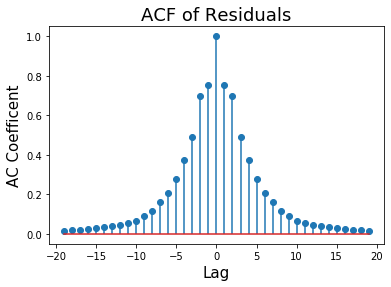

In [187]:
# G plot the autocorrelation of y(t)
# 20, 40, and 80 lags
acf_202 = ACF(ARMA10000[0],20)
acf_plot(acf_202)

The mean of this dataset is:  9.985646228306974
79


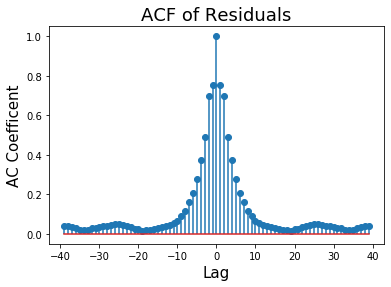

In [188]:
acf_402 = ACF(ARMA10000[0],40)
acf_plot(acf_402)

The mean of this dataset is:  9.985646228306974
159


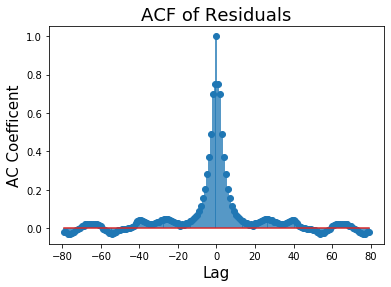

In [189]:
acf_802 = ACF(ARMA10000[0],80)
acf_plot(acf_802)